In [1]:
# Write the requirements
!echo "" > requirements.txt
!echo "qiskit[all]~=2.0" >> requirements.txt
!echo "qiskit-ibm-runtime~=0.37" >> requirements.txt
!echo "qiskit-aer~=0.17" >> requirements.txt
!cat requirements.txt

# Install the notebook requirements
!pip install -q -r requirements.txt

import qiskit
import qiskit_ibm_runtime
import qiskit_aer

# Log package versions
print(f"qiskit version: {qiskit.__version__}")
print(f"qiskit-ibm-runtime version: {qiskit_ibm_runtime.__version__}")
print(f"qiskit-aer version: {qiskit_aer.__version__}")


qiskit[all]~=2.0
qiskit-ibm-runtime~=0.37
qiskit-aer~=0.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.7 MB/s eta

Before run this part:

1. Go to <https://quantum.ibm.com/> and copy the token
2. Open the secret tab here on colab on the left.
3. Create a new secret
4. Enable the access of the notebook to the secret

Name: QISKIT_IBM_TOKEN

Value: \<paste-your-token\>

In [2]:
try:
  from google.colab import userdata

  IN_COLAB = True

except:
  IN_COLAB = False


if IN_COLAB:
  token = userdata.get("QISKIT_IBM_TOKEN")
else:
  print("This notebook must be run on Colab")


from qiskit_ibm_runtime import QiskitRuntimeService


## The Algorithm


### Quantum Circuit

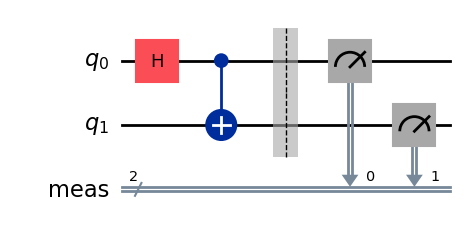

In [3]:
from qiskit import QuantumCircuit


# Create a new circuit with two qubits
qc = QuantumCircuit(2)
# Add a Hadamard gate to qubit 0
qc.h(0)
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
# Measure all qubits
qc.measure_all()


qc.draw("mpl")


## Some Other New Concepts



### Observable

An observable is a measurable physical quantity in a quantum system. In mathematical terms, it's represented by a Hermitian operator - meaning its eigenvalues are real and correspond to possible measurement outcomes.

 Example:

Let’s define a simple Hamiltonian for a 2-qubit system:

$$
H = Z_0 Z_1 + X_0
$$

This is a sum of Pauli operators, where:

-	Z_0 Z_1 means “apply Z on qubit 0 and Z on qubit 1”
-	X_0 means “apply X on qubit 0”


In Qiskit, you can represent this observable as:

```python
from qiskit.quantum_info import SparsePauliOp

H = SparsePauliOp.from_list([("ZZ", 1.0), ("XI", 1.0)])
```

Then, you can use an Estimator to compute:

$$
\langle \psi(\theta) | H | \psi(\theta) \rangle
$$

which tells you the expected energy of the system when it’s in the state $|\psi(\theta)\rangle$.

### Primitive Unified Bloc

In Qiskit, [PUB](https://qiskit.qotlabs.org/guides/primitive-input-output?utm_source=chatgpt.com) stands for Primitive Unified Bloc. It represents a fundamental unit of work submitted to Qiskit’s Runtime primitives, such as the Estimator and Sampler. Each PUB encapsulates all the necessary information to execute a quantum task, including the quantum circuit, parameter values, and, when applicable, observables.



## Simulator

### Sampler

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler   # Sampler == SamplerV2
from qiskit_aer import AerSimulator

# 1) local service, no token is necessary
service = QiskitRuntimeService(channel="local")

# 2) local backend (Aer o fake backend)
backend = AerSimulator()

# 3) create the primitive
sampler = Sampler(mode=backend)

In [5]:
# 4) execution
job = sampler.run([qc])
result = job.result()

# 5) get results
pub        = result[0]             # first and only PUB
bit_array  = pub.data.meas         # 'meas' is the register created by measure_all()

counts = bit_array.get_counts()    # dict bitstring -> occurrences
probs  = {k: v / bit_array.num_shots for k, v in counts.items()}  # probabilities

print("Counts:", counts)
print("Probabilities:", probs)

Counts: {'11': 509, '00': 515}
Probabilities: {'11': 0.4970703125, '00': 0.5029296875}


### Esitimator

In [6]:
from qiskit.quantum_info import SparsePauliOp

In [7]:
# Set up six different observables.

observables_labels = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
observables = [SparsePauliOp(label) for label in observables_labels]

In [8]:
# To see what the first of these operator does
observables[0].to_matrix()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [9]:
from qiskit_aer.primitives import EstimatorV2 as Estimator
# from qiskit_ibm_runtime import EstimatorV2 as Estimator


estimator = Estimator()

pub_0 = (qc, observables)
job = estimator.run([pub_0])

result = job.result()

# one input pub -> a list of only one result in output
pub_result = result[0]

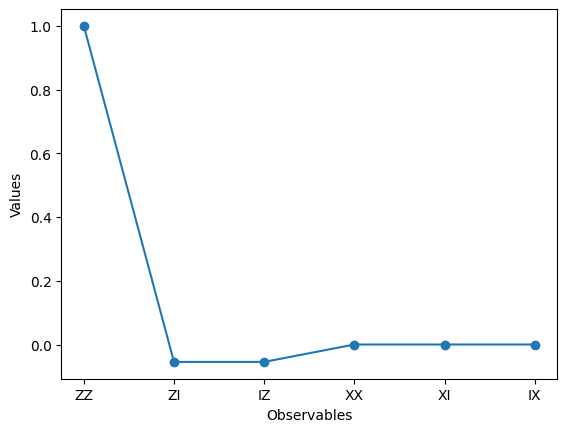

In [10]:
# Plot the result
from matplotlib import pyplot as plt

def plot_estimator_results(pub_result, observables_labels):
    values = pub_result.data.evs
    errors = pub_result.data.stds
    plt.plot(observables_labels, values, "-o")
    plt.xlabel("Observables")
    plt.ylabel("Values")
    plt.show()

plot_estimator_results(pub_result, observables_labels)

## Remote Execution

Let us start implementing a [GHZ State](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) in N qubits. Here an example with N=3:

![](https://upload.wikimedia.org/wikipedia/en/5/57/The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png?20191230194117)


### 1. Create the Circuit

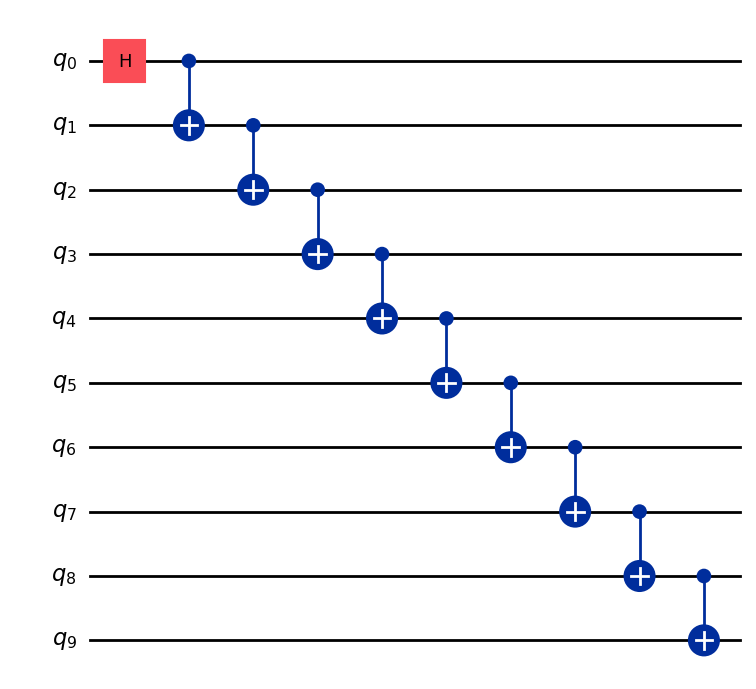

In [11]:
def get_qc_for_n_qubit_GHZ_state(n):
  qc = QuantumCircuit(n)
  qc.h(0)
  for i in range(n-1): qc.cx(i, i+1)
  return qc

n = 10
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw("mpl")

In [12]:
def get_observables_for_n_qubit_circuit(n):
    observables_labels = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
    observables = [SparsePauliOp(observable_label) for observable_label in observables_labels]
    return observables, observables_labels

observables, observables_labels = get_observables_for_n_qubit_circuit(n)
print(observables_labels)

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']


### Prepare the Runtime Service

In [13]:
# Using Cloud
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types.
  overwrite=True # Only needed if you already have Cloud credentials.
)

In [14]:
# Backend
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

<ipython-input-14-ed08a3d5d05e>:7: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  backend = QiskitRuntimeService().backend(backend_name)


<ipython-input-15-bc3b8b0afcac>:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


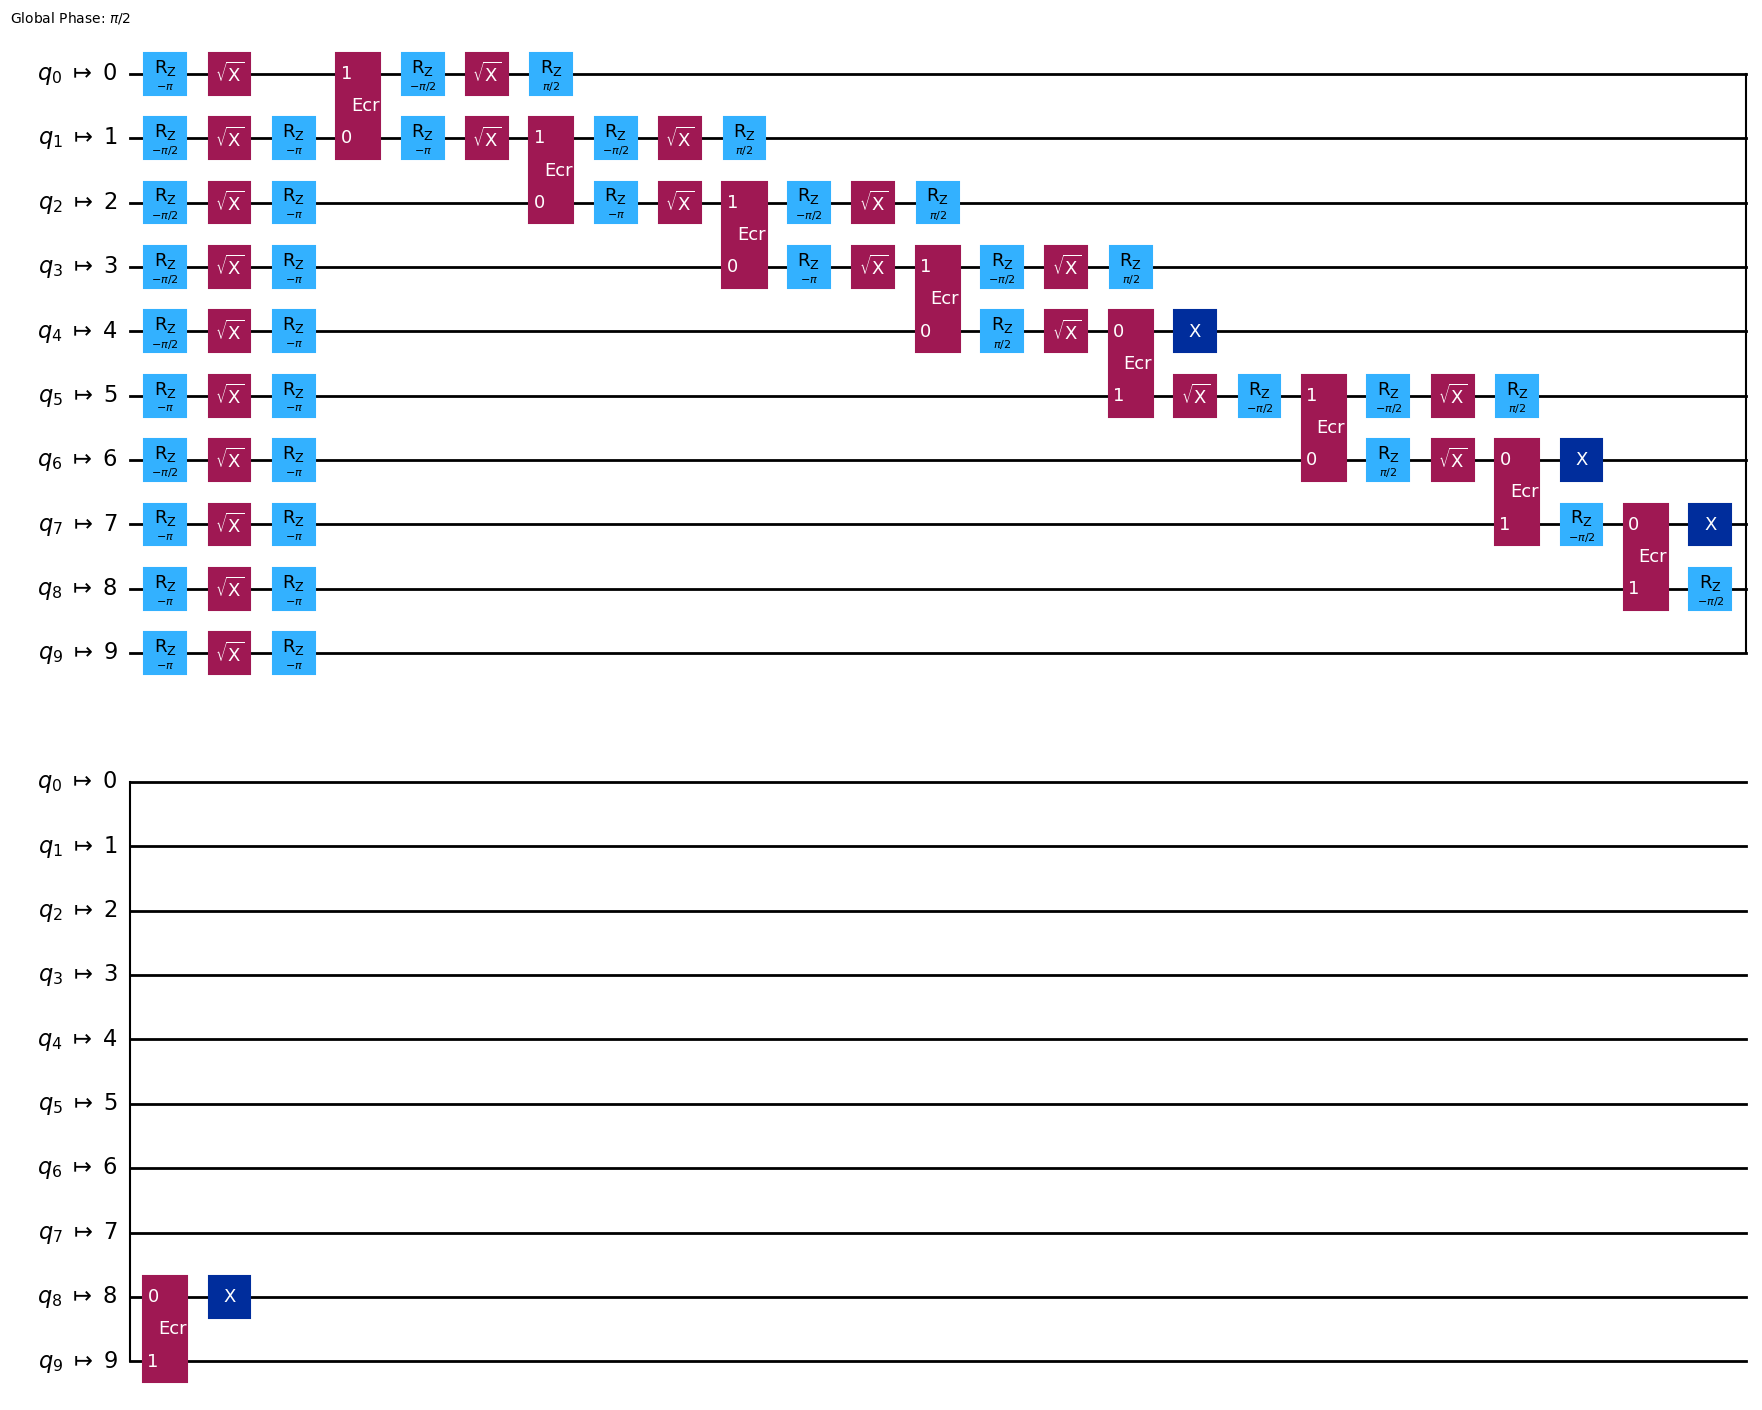

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

In [16]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator


# Construct the Estimator instance.
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
pub_0 = (isa_circuit, mapped_observables)

dry_run = True

if not dry_run:
    job = estimator.run([pub_0])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

# >>> Job ID: d0r8y6r93rd0008n99bg

>>> Job ID: 6ea0590a-a27f-4831-8e30-ed87be3f38e9


Now you can find your process listed here: <https://quantum.ibm.com/workloads>

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types.
  # name="account-name", # Optionally name this set of credentials.
  overwrite=True # Only needed if you already have Cloud credentials.
)
service = QiskitRuntimeService()


job_id = "d0r8y6r93rd0008n99bg" # old job
job = service.job(job_id)

<ipython-input-17-8f38d9c5745c>:8: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [18]:
# Get the result of the entire subimission
job_result = job.result()

# We sent a list of a single PUB, we get a list of one element, we take it.
pub_result = job.result()[0]

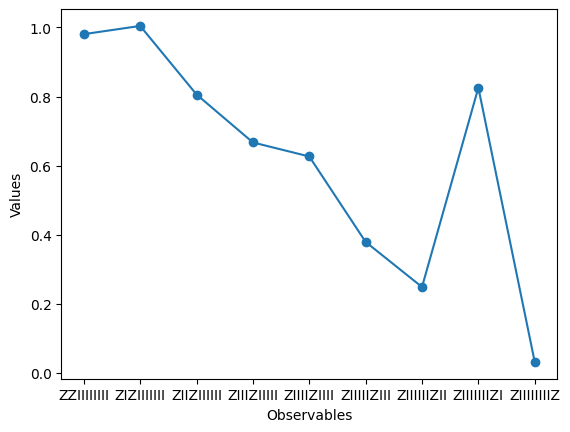

In [19]:
from matplotlib import pyplot as plt


# Plot the result
plot_estimator_results(pub_result, observables_labels)

## Appendix

### `SparsePauliOp`

$$
\texttt{SparsePauliOp}\bigl(\,[P_1,P_2,\dots,P_n],\;[c_1,c_2,\dots,c_n]\,\bigr)
\;=\;
\sum_{i=1}^{n} c_i\,P_i
$$

In [20]:
op = SparsePauliOp(["XZ", "ZZ"], [1, 0.5])

print(op.size)        # 2
print(op.paulis[1])   # 'XZ'
print(op.coeffs[1])   # 0.5+0.j

single_term = op[1]   # SparsePauliOp con un solo termine ('XZ', 1)
print("\nSingle Term:\n")
print(single_term)

2
ZZ
(0.5+0j)

Single Term:

SparsePauliOp(['ZZ'],
              coeffs=[0.5+0.j])
